# Image Datasets

## Copyright notice

This version (c) 2019 Fabian Offert, [MIT License](LICENSE).

## Imports

We are using the `BeautifulSoup`library to find specific tags on websites and the `requests` library to download, i.e. "request" websites.

In [5]:
from bs4 import BeautifulSoup
import os
import sys
import time
import requests
import numpy as np
from tqdm import tnrange, tqdm_notebook
import sys
sys.path.append('lib/')
from esu_util import show_img, np_PIL, PIL_np
from PIL import Image

## Our toy dataset: WGA-small (2200 samples)

This is a (for ML) tiny dataset, scraped from the web gallery of art and consisting of 2x1100 high-quality images in two classes: "portrait" and "landscape" paintings. 1000 images of each classes are reserved for *training*, 100 images of each class are reserverd for *testing* our machine learning classifier. It is available as part of the workshop repository in the `wga`folder. The below code presents some randomly picked samples from the dataset, utilizing coding practices we have learned.

2200 files found


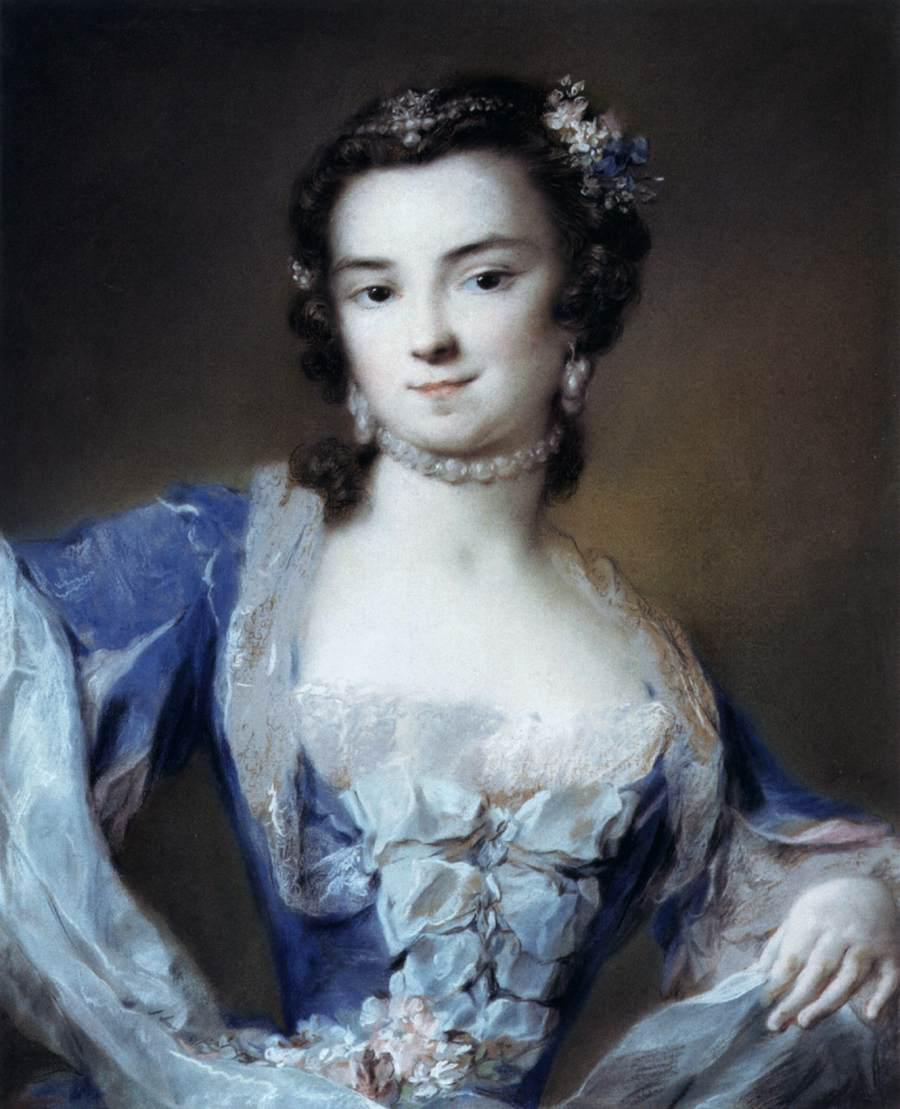

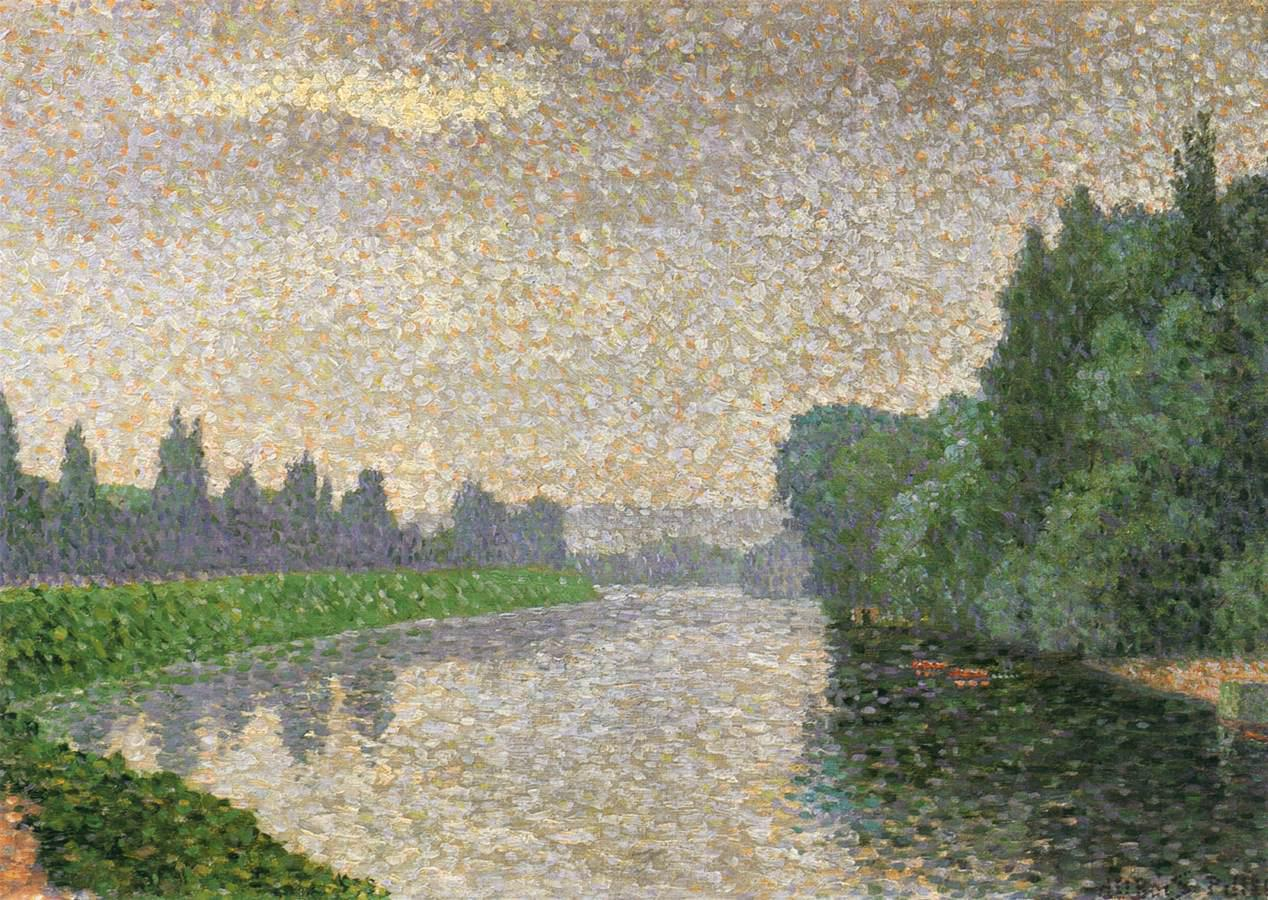

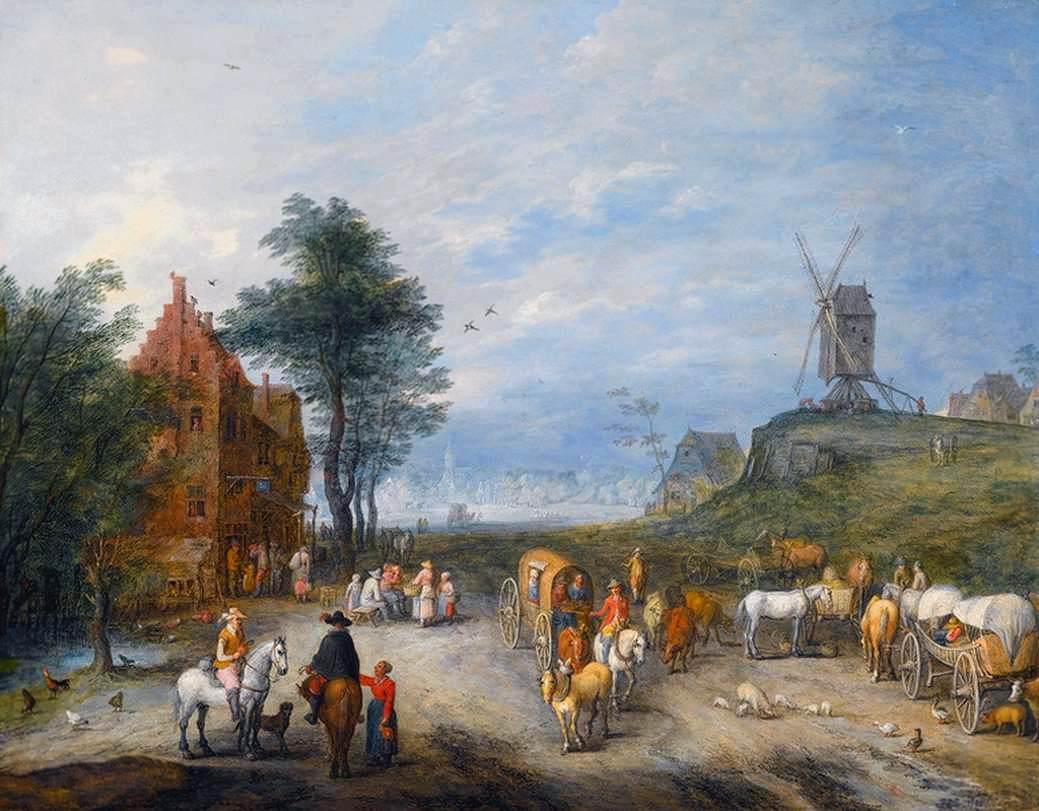

In [10]:
folder = 'wga' # Relative path
imgs = []
for root, dirs, files in os.walk(folder):
    for file in files:
        if file.endswith('.jpg'):
            imgs.append(f'{root}/{file}')
print(f'{len(imgs)} files found')
random_imgs = np.random.choice(imgs, 3)

for img in random_imgs:
    show_img(Image.open(img))

## Our real-life dataset: MoMA collection (64780 samples)

The New York City Museum of Modern Art collection consist of almost 200,000 works, 81,000 of which are available online. 64780 of these avaible works are part of this ("unsupervised", i.e. metadata-less), high-quality dataset.

64780 files found


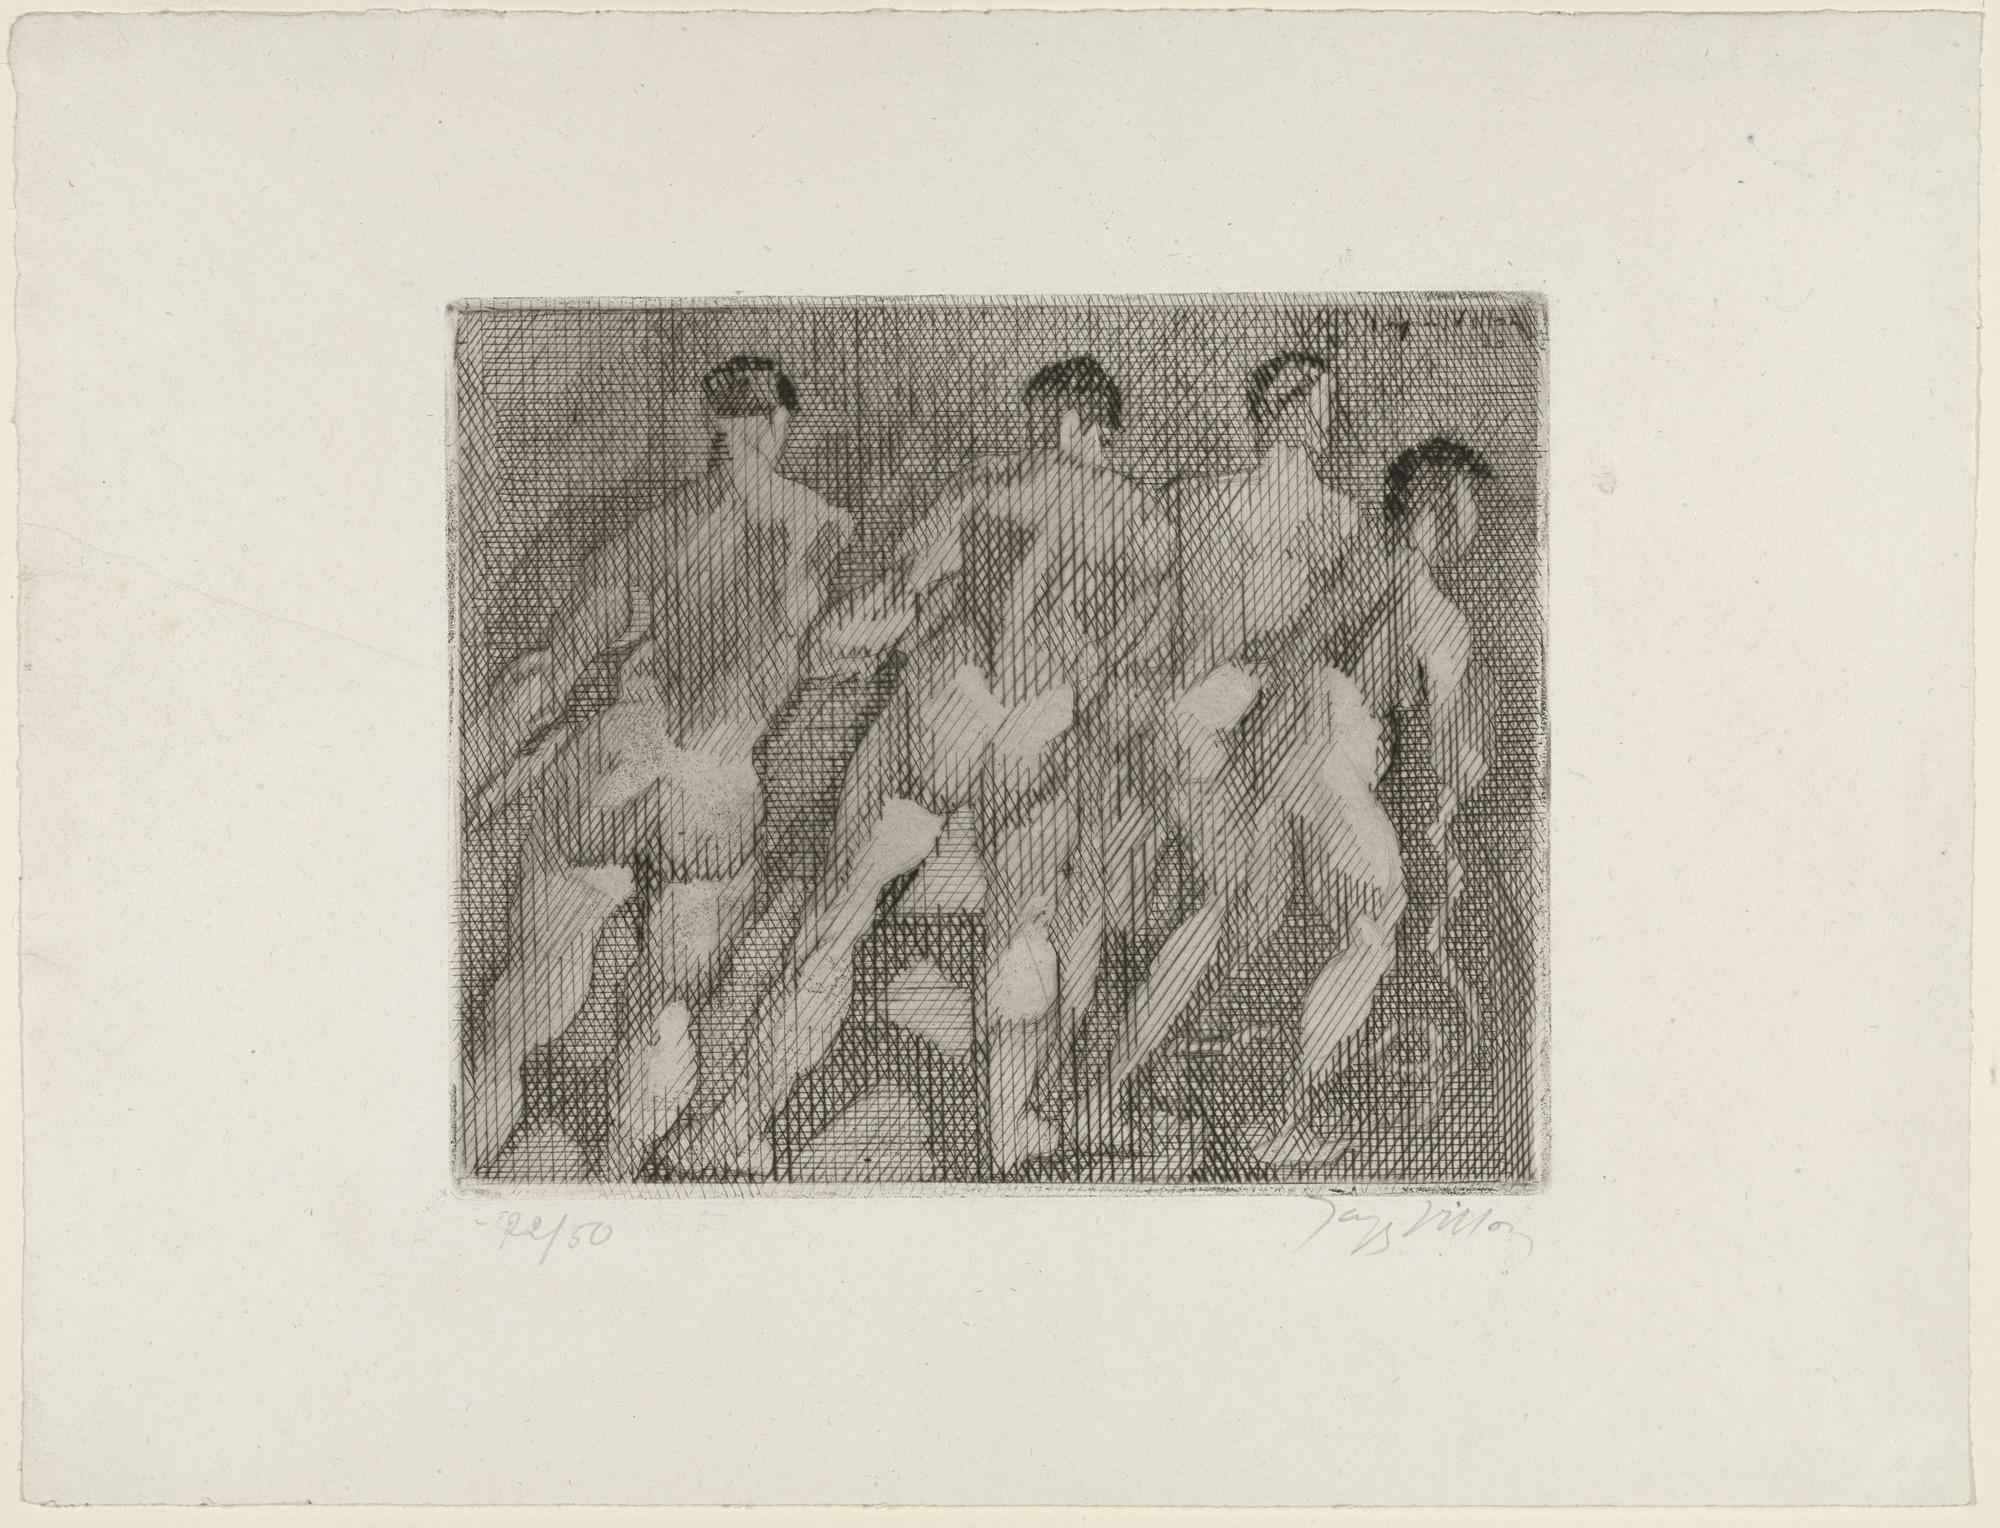

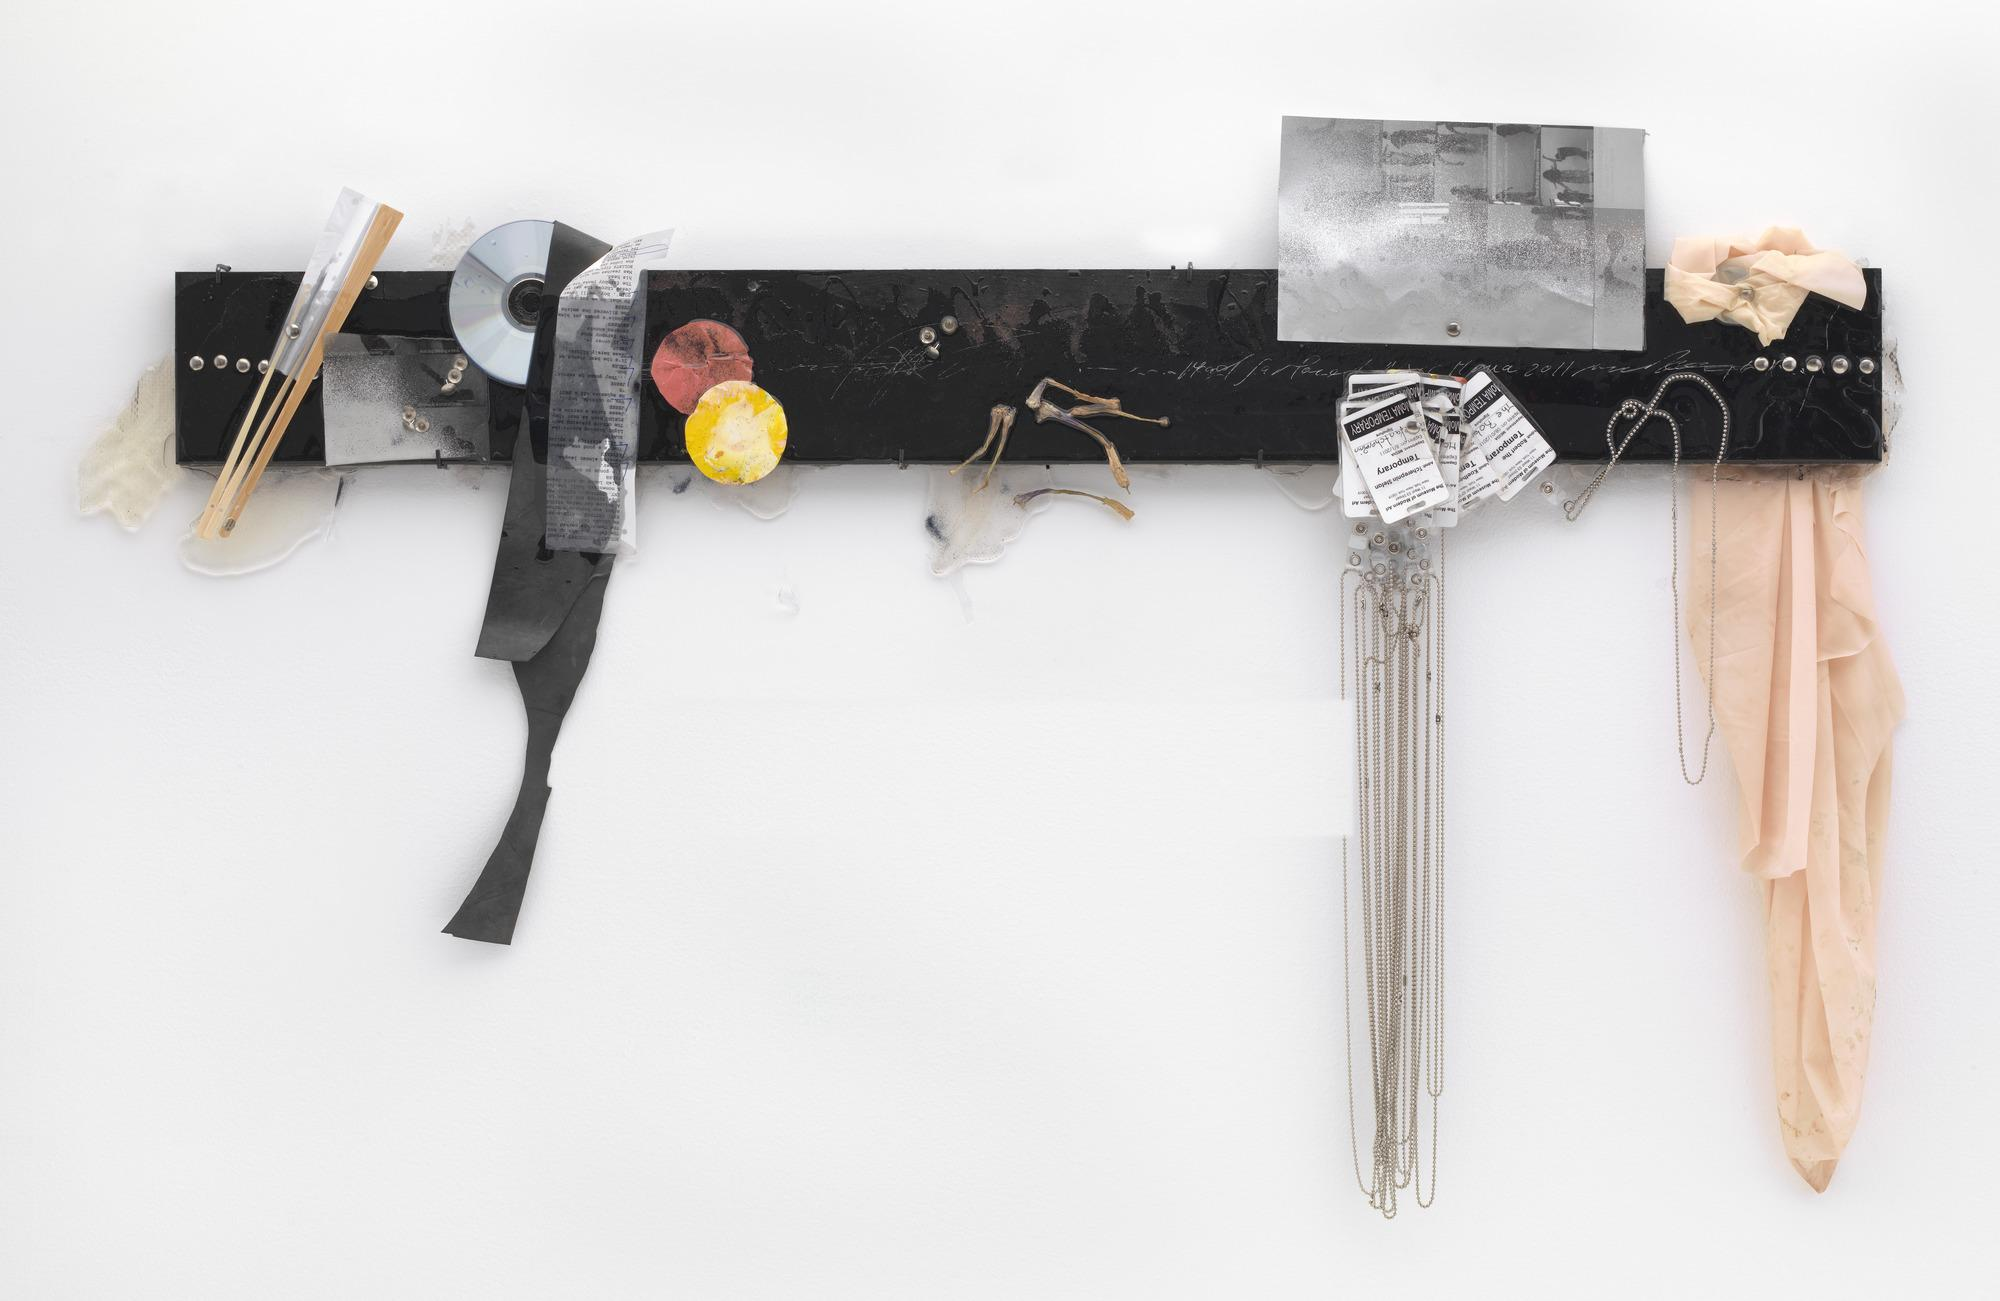

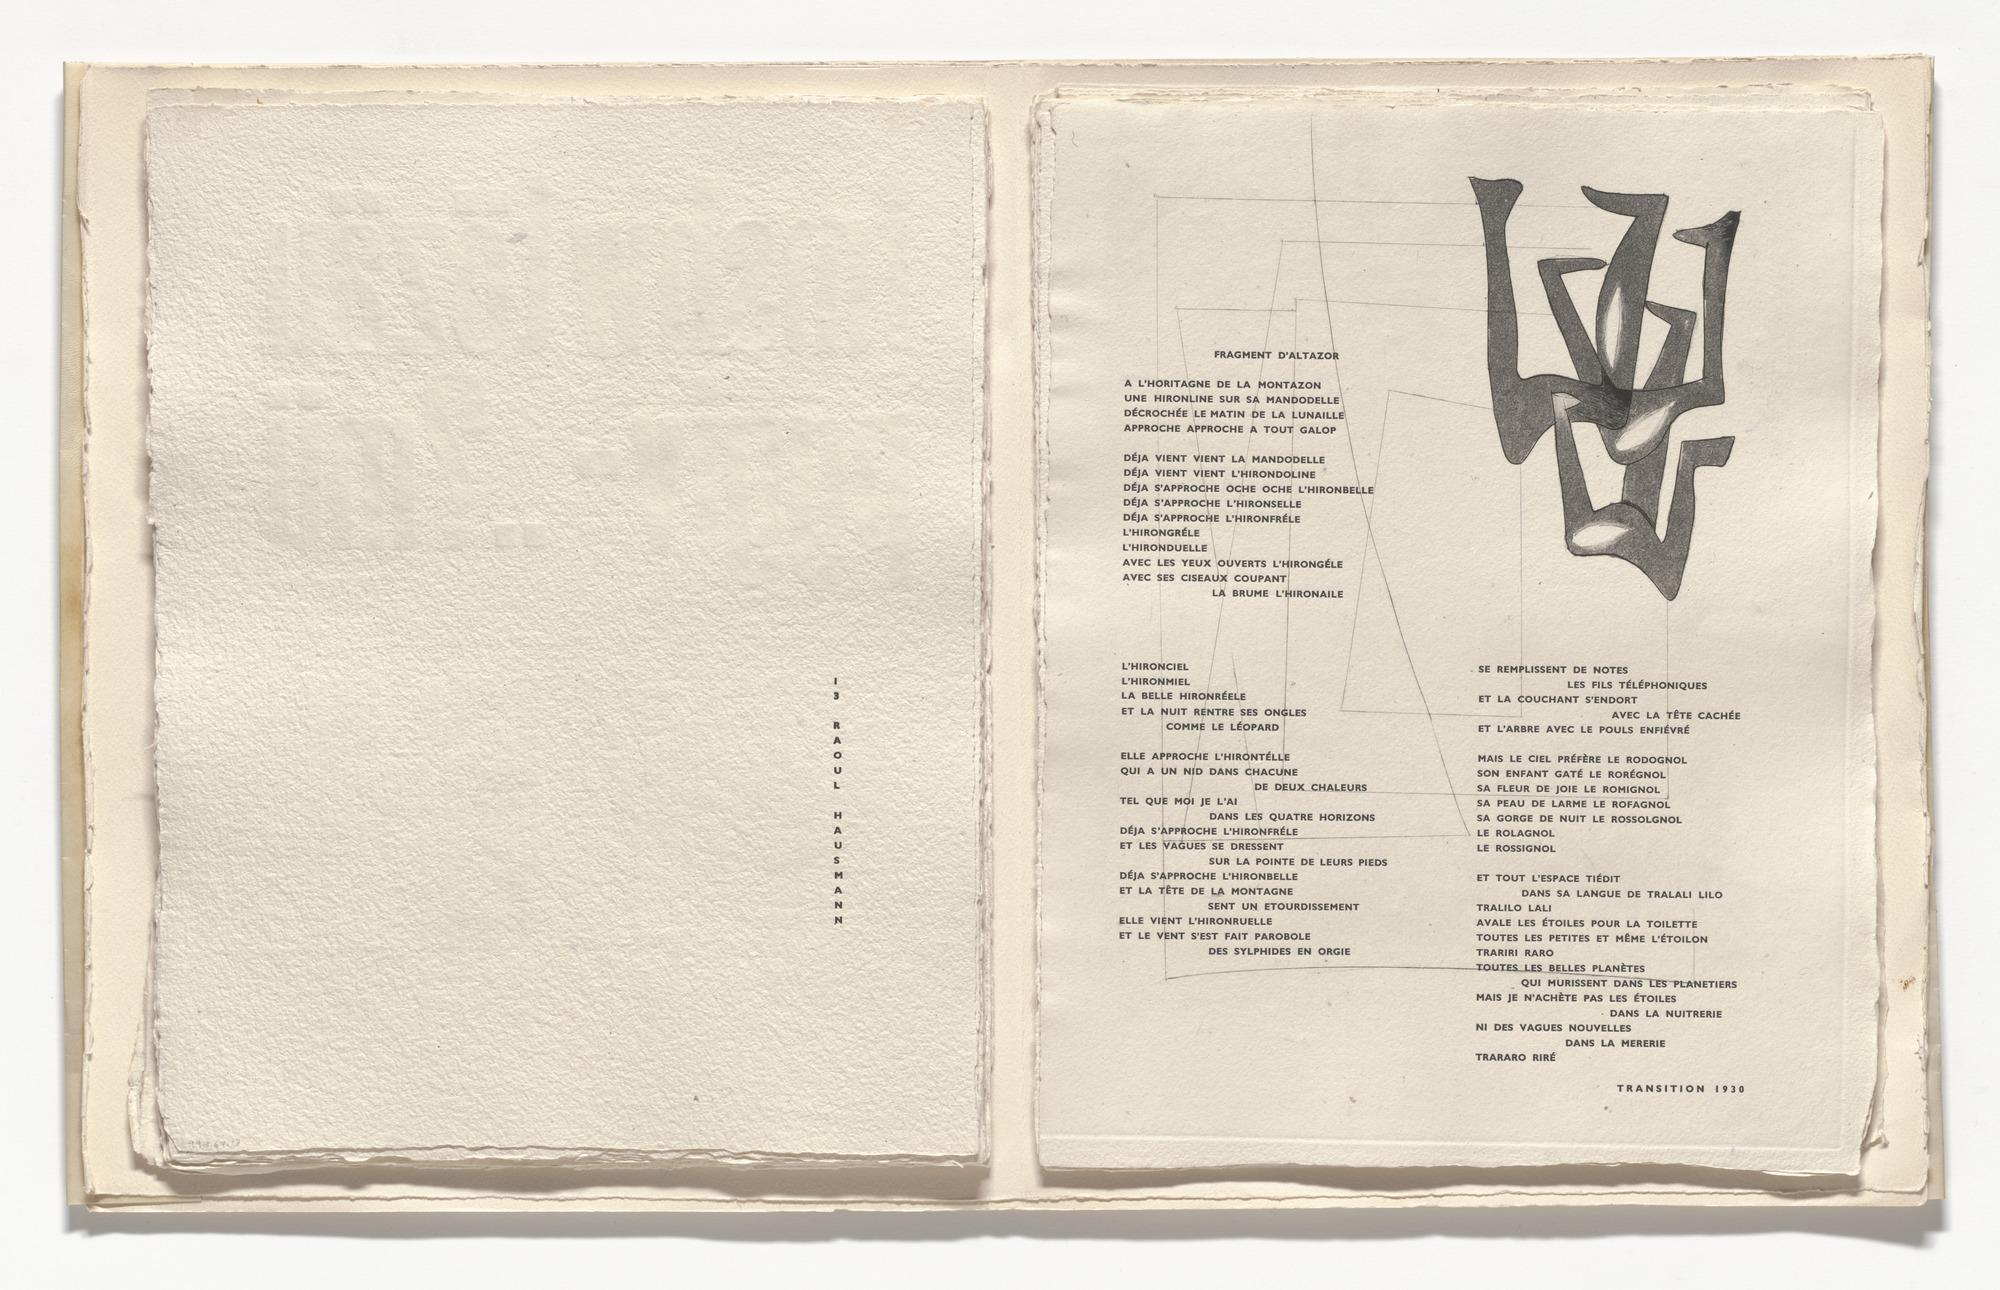

In [12]:
folder = '/home/fabian/datasets-live/moma/images' # Relative path
imgs = []
for root, dirs, files in os.walk(folder):
    for file in files:
        if file.endswith('.jpg'):
            imgs.append(f'{root}/{file}')
print(f'{len(imgs)} files found')
random_imgs = np.random.choice(imgs, 3)

for img in random_imgs:
    show_img(Image.open(img))

Screenshot of the source code in browser with relevant lines highlighted

## A questionable mega-dataset: ImageNet

- What is it: http://www.image-net.org/
- Download the ILSVRC2012 subset: http://www.image-net.org/challenges/LSVRC/2012/nonpub-downloads

## Scraping a dataset: MoMA example 

Some datasets are harder to scrape then others. The MoMA website is a particular easy example. Generally, the process is always the same: inspect the URL and source code of the website with regard to how it presents a single work/image file. Then automate the this process.

![](img/moma-back.jpg)

![](img/moma-front.jpg)

We need a directory to save the downloaded images.

In [ ]:
DIRECTORY = 'moma'
TOTAL_PAGES = 1000000 # Unclear what the limit is, getting 404s/no images is "cheap" enough though to brute-force
if not os.path.exists(DIRECTORY): os.makedirs(DIRECTORY)

A function to save an image file from a direct image URL, specific to the MoMA website.

In [4]:
def save(url):
    data = requests.get(url).content
    name = url.split('?sha=')[-1] # SHA as name
    file = f'{DIRECTORY}/{name}.jpg'
    with open(file, 'wb') as f:
        f.write(data)

A function to process one page on the MoMA website.

In [5]:
def process_page(page):
    url = f'https://www.moma.org/collection/works/{page}'   
    try:
        response = requests.get(url)
        if response.status_code == 200: # If we get a positive response from the server...
            soup = BeautifulSoup(response.content, 'html.parser') # Parse the page
            imgs = soup.findAll('img', 'picture__img--focusable') # Find a specific class of the img tag
            if len(imgs) == 1: # If there is just one image
                src = imgs[0].get('src') # Get the image URL
                save(f'https://www.moma.org{src}') # Save the image
                return True # Only return true if image was downloaded
            else:
                print(f'E2: {len(imgs)} links on page {page}') # Ignore multiple image pages
                return False
        else: 
            print(f'E3: Response {response.status_code} for page {page}')
            return False
    except:
        print(f'E1: No response for page {page}')
        return False

Start scraping!

In [ ]:
# Every work has a unique page number, starting (for some reason) with 200000 - found by trial and error
n = 0
for page in tnrange(200000, TOTAL_PAGES + 1):
    n += process_page(page) # Keep track of nr. of downloaded images
    if page % 20 == 0: # Print status every 20 pages
        print(f'{n} images downloaded so far...')

Please note that this process can be sped up massively by using multiple threads to download the images. An implementation is provided as a [Python script here](moma-scraper.py)

## <font color='red'>Exercises</font>

1. Find an online image dataset that interests you to scrape - it does not have to be gigantic, nor does it have to be high-quality. Start by looking at the page source to see if the scraping could be automated. Look for possible tags to find images. Finally, try to adapt the script above for your dataset.
2. How could we add some metadata to this process?